# Myanmar Coup fatality Dataset

source: [aappb](https://aappb.org/?cat=109)

In [1]:
import camelot
import numpy as np
import matplotlib.pyplot as plt

## Load data from pdf file

In [2]:
tables = camelot.read_pdf("Recent-Fatality-List-for-October-22-2021-EnglishFinal.pdf", pages='1-end')
tables.n

123

In [102]:
dataset = tables[0].df

for tableIndex in range(1, tables.n):
    dataset = dataset.append(tables[tableIndex].df, ignore_index=True)

dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's \nname,Date of \nIncident,Deceased \nDate,Organization,Place of \nIncidents,Home Adress Township,,States/Region\ns,Remarks
1,1,Na Pwar (aka) Ko \nNyi Nyi Oo,M,32,U Hla Ngwe,8-Feb-21,8-Feb-21,Civilian,Mandalay,"75 Street, \nbetween 37 and \n38 Street",Maha Aung \nMyay,Mandalay,"In another incident, 32 year old Ko \nNa Pwar ..."
2,2,Mya Thwate Thwate \nKhaing,F,19,U Min Lwin,9-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaun\ng, Lower \nPaunglaung \nHydro P...",Zeyathiri,Naypyitaw,"On February 9, peaceful anti-coup \nprotests i..."
3,,3 Nay Nay Win Htet,M,18,Unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, \nTanintharyi \nRegion",Toe Chal Ward,Myeik,Tanithary,"On 15 February evening, 18-year old \nMaung Na..."
4,4,Thet Naing Win \n(aka) Min Min,M,37,U Maung \nSan,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, \nMandalay City",Near 41 Street,Maha Aung \nMyay,Mandalay,"In Mandalay, a shipyaroad raid \nturned violen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1131 July San,,F,7,Unknown \nName,16-Oct-21,16-Oct-21,Civilian,In The Hut,,Khin-u,Chin,A six year old girl was killed due to \nan art...
1132,1132 Ling Choi,,M,59,U Naing \nNing,16-Oct-21,16-Oct-21,Civilian,On The Road,,Matupi,Chin,Ling Choi died whilst going to a farm \nwhen h...
1133,1133 Kyi Thein,,M,70,Unknown \nName,20-Oct-21,21-Oct-21,Civilian,,Wat Chaung \nVillage,Yebyu,Tanintharyi,"On the night of October 20, terrorist \njunta ..."
1134,,1133+ 53 (Bago \nCase),,,,,,,,,,,


## Cleanup data

 Cleanup newline (\n)

In [103]:
dataset = dataset.applymap(lambda str: str.replace('\n', ''))
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Adress Township,,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,8-Feb-21,8-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Maha Aung Myay,Mandalay,"In another incident, 32 year old Ko Na Pwar ((..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,9-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyitaw,"On February 9, peaceful anti-coup protests in ..."
3,,3 Nay Nay Win Htet,M,18,Unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanithary,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win (aka) Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1131 July San,,F,7,Unknown Name,16-Oct-21,16-Oct-21,Civilian,In The Hut,,Khin-u,Chin,A six year old girl was killed due to an artil...
1132,1132 Ling Choi,,M,59,U Naing Ning,16-Oct-21,16-Oct-21,Civilian,On The Road,,Matupi,Chin,Ling Choi died whilst going to a farm when he ...
1133,1133 Kyi Thein,,M,70,Unknown Name,20-Oct-21,21-Oct-21,Civilian,,Wat Chaung Village,Yebyu,Tanintharyi,"On the night of October 20, terrorist junta so..."
1134,,1133+ 53 (Bago Case),,,,,,,,,,,


Fix column names

In [104]:
header = dataset.head(1).to_numpy()[0]
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Adress Township', '', 'States/Regions', 'Remarks'],
      dtype=object)

In [105]:
header[-5] = 'Place of Incidents'
header[-4] = 'Home Address'
header[-3] = 'Township'
header[-2] = 'States/Regions'
header[-1] = 'Remarks'
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Address', 'Township', 'States/Regions', 'Remarks'],
      dtype=object)

In [106]:
dataset.columns = header
dataset = dataset.drop(index=0)
dataset = dataset.drop(dataset.tail(2).index)

dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,8-Feb-21,8-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Maha Aung Myay,Mandalay,"In another incident, 32 year old Ko Na Pwar ((..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,9-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyitaw,"On February 9, peaceful anti-coup protests in ..."
3,,3 Nay Nay Win Htet,M,18,Unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanithary,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win (aka) Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
5,,5 Wai Yan Tun,M,16,Unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1129 Ba Hein,,M,,Unknown Name,15-Oct-21,15-Oct-21,ARA member,On The Road,,Ayadaw,Sagaing,Thamine and Ba Hein from the Ayadaw Revolution...
1130,1130 Myo Swe,,M,39,Unknown Name,16-Oct-21,16-Oct-21,Civilian,Pyin Htaung Village,Shweku Talsu Village,Khin-u,Sagaing,"In the early morning of October 16, Myo Swe, l..."
1131,1131 July San,,F,7,Unknown Name,16-Oct-21,16-Oct-21,Civilian,In The Hut,,Khin-u,Chin,A six year old girl was killed due to an artil...
1132,1132 Ling Choi,,M,59,U Naing Ning,16-Oct-21,16-Oct-21,Civilian,On The Road,,Matupi,Chin,Ling Choi died whilst going to a farm when he ...


Parse age that inclulde string

In [107]:
def parse_age(age):
  if age.find(' ') > 0:
    if 'Around one-years-old' in age:
      return '1'
    else:
      strList = age.split(' ')
      return strList[strList.index(next(filter(lambda x: x.isdigit(), strList)))] 
  return age

dataset['Age'] = dataset['Age'].apply(parse_age)

Expand combined row

In [108]:
for index, row in dataset.iterrows():
    name = row['Name']
    numbers = [int(s) for s in name.split() if s.isdigit()]

    # Number exist in name case
    if len(numbers) > 0:
        # Remove number from name
        dataset.at[index,'Name']= name.replace(str(numbers[0]), '').strip()
        
        # Combined row case
        if row['No.'] != '' and 'unknown name' in name.lower():
            for i in range(numbers[0] - 1):
                dataset = dataset.append(row)

dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,8-Feb-21,8-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Maha Aung Myay,Mandalay,"In another incident, 32 year old Ko Na Pwar ((..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,9-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyitaw,"On February 9, peaceful anti-coup protests in ..."
3,,Nay Nay Win Htet,M,18,Unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanithary,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win (aka) Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
5,,Wai Yan Tun,M,16,Unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Maha Aung Myay,Mandalay,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1129 Ba Hein,,M,,Unknown Name,15-Oct-21,15-Oct-21,ARA member,On The Road,,Ayadaw,Sagaing,Thamine and Ba Hein from the Ayadaw Revolution...
1130,1130 Myo Swe,,M,39,Unknown Name,16-Oct-21,16-Oct-21,Civilian,Pyin Htaung Village,Shweku Talsu Village,Khin-u,Sagaing,"In the early morning of October 16, Myo Swe, l..."
1131,1131 July San,,F,7,Unknown Name,16-Oct-21,16-Oct-21,Civilian,In The Hut,,Khin-u,Chin,A six year old girl was killed due to an artil...
1132,1132 Ling Choi,,M,59,U Naing Ning,16-Oct-21,16-Oct-21,Civilian,On The Road,,Matupi,Chin,Ling Choi died whilst going to a farm when he ...


Drop unused columns

In [109]:
dataset = dataset.drop(columns=['No.','Name',"Father's name", 'Home Address', 'Deceased Date', 'Place of Incidents', 'Township', 'States/Regions', 'Remarks'])
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,8-Feb-21,Civilian
2,F,19,9-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
1129,M,,15-Oct-21,ARA member
1130,M,39,16-Oct-21,Civilian
1131,F,7,16-Oct-21,Civilian
1132,M,59,16-Oct-21,Civilian


## Explore data

In [110]:
dataset.describe()

,Sex,Age,Date of Incident,Organization
count,1133,1133,1133,1133
unique,4,73,197,102
top,M,,27-Mar-21,Civilian
freq,1022,262,162,941


In [111]:
dataset['Sex'].value_counts()

M       1022
F         81
          29
LGBT       1
Name: Sex, dtype: int64

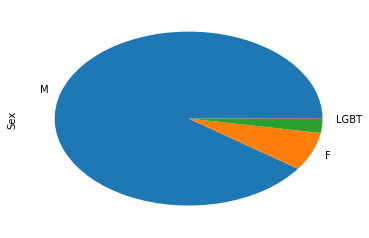

In [112]:
dataset['Sex'].value_counts().plot(kind='pie')


In [113]:
dataset['Age'].value_counts()

      262
30     50
19     48
20     44
40     40
     ... 
6       1
87      1
7       1
5       1
78      1
Name: Age, Length: 73, dtype: int64

(array([  9., 135., 286., 221., 123.,  58.,  22.,  13.,   3.,   1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

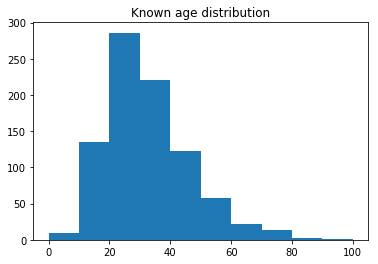

In [114]:
ages = dataset['Age'].to_numpy()

fig, ax = plt.subplots()
ax.set_title('Known age distribution')
ax.hist(ages[ages != ''].astype(np.int), range=[0, 100])

In [115]:
dataset['Organization'].value_counts()

Civilian                                     941
Student                                       58
Teacher                                        9
NLD                                            5
Medic, Medical Doctor                          4
                                            ... 
Security Force, Former Military Officer        1
Company, Staff, Ayeyarwady Bank                1
Professional, Tourist Guide                    1
NLD, Executive Member, Zabuthiri Township      1
Student, Grade 9                               1
Name: Organization, Length: 102, dtype: int64

In [116]:
def conbine_organization(org):
    lower_org = org.lower()
    if 'student' in lower_org or 'b.a' in lower_org:
        return 'Student'
    elif 'doctor' in lower_org or 'nurse' in lower_org:
        return 'Doctor/Nurse'
    elif 'nld' in lower_org:
        return 'NLD'
    elif 'engineer' in lower_org:
        return 'Engineer'
    elif 'teacher' in lower_org:
        return 'Teacher'
    elif 'bank staff' in lower_org or 'kbz' in lower_org:
        return 'Bank Staff'
    elif 'servant' in lower_org or 'department' in lower_org:
        return 'Civil Servant'
    elif 'civilian' in lower_org:
        return 'Civilian'
    elif 'activist' in lower_org:
        return 'Activist'
    else:
        return org

grouped_organizations = dataset['Organization'].apply(conbine_organization)
grouped_organizations.value_counts()

Civilian                                                                     945
Student                                                                       78
NLD                                                                           15
Teacher                                                                       14
Doctor/Nurse                                                                   9
Civil Servant                                                                  7
Engineer                                                                       6
Activist                                                                       4
Farmer                                                                         4
Volunteer                                                                      4
Artist, Poet                                                                   3
ARA member                                                                     2
Worker Association          

In [117]:
grouped_organizations_counts = grouped_organizations.value_counts()

def cut_other_organizations(org):
    if grouped_organizations_counts[org] < 4:
        return 'Other'
    return org

grouped_organizations = grouped_organizations.apply(cut_other_organizations)
grouped_organizations.value_counts()

Civilian         945
Student           78
Other             47
NLD               15
Teacher           14
Doctor/Nurse       9
Civil Servant      7
Engineer           6
Volunteer          4
Farmer             4
Activist           4
Name: Organization, dtype: int64

In [118]:
dataset['Organization'] = grouped_organizations
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,8-Feb-21,Civilian
2,F,19,9-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
1129,M,,15-Oct-21,Other
1130,M,39,16-Oct-21,Civilian
1131,F,7,16-Oct-21,Civilian
1132,M,59,16-Oct-21,Civilian


## Export JSON

In [119]:
dataset.columns = ['sex', 'age', 'dateOfIncident', 'organization']
dataset

,sex,age,dateOfIncident,organization
1,M,32,8-Feb-21,Civilian
2,F,19,9-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
1129,M,,15-Oct-21,Other
1130,M,39,16-Oct-21,Civilian
1131,F,7,16-Oct-21,Civilian
1132,M,59,16-Oct-21,Civilian


In [120]:
dataset.to_csv('recent-fatality.csv', index=False)